## <span style = 'color: red'> Importing Necessary Libraries </span>

In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string 
import nltk
from wordcloud import WordCloud
%matplotlib inline

### <span style = 'color: red'> Warnings </span>

In [2]:
import warnings
warnings.filterwarnings('ignore')

### <span style = 'color: red'> Reading Data from CSV file </span>

In [4]:
tweets = pd.read_csv('Sentiments.csv')
tweets

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


### <span style = 'color: red'> Checking shape </span>

In [5]:
tweets.shape

(31962, 3)

### <span style = 'color: red'> Checking first 5 rows </span>

In [6]:
tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


### <span style = 'color: red'> Summary Check </span>

In [7]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


### <span style = 'color: red'> Remove "pattern" in the inpute text </span>

In [8]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [9]:
tweets

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


### <span style = 'color: red'> Removing "Twitter Handles" @ user </span>

In [11]:
tweets['clean_tweet'] = np.vectorize(remove_pattern)(tweets['tweet'], "@[\w]*")
tweets.head()


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


### <span style = 'color: red'> Removing "Special Characters, Number, and Punctuations" </span>

In [12]:
tweets['clean_tweet'] = tweets['clean_tweet'].str.replace("[^a-z A-Z#]", " ")
tweets.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


### <span style = 'color: red'> Removing "Twitter Handles" @ user </span>

In [13]:
tweets['clean_tweet'] = tweets['clean_tweet'].apply(lambda x : " ".join([w for w in x.split() if (len(w)>2)]))
tweets.head()


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish drags hi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit can't use cause they d...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time urð±!!! ð...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


### <span style = 'color: red'> Tokens </span>

In [14]:
tokenized_tweet = tweets['clean_tweet'].apply(lambda x : x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, and, selfish, dr...
1    [thanks, for, #lyft, credit, can't, use, cause...
2                              [bihday, your, majesty]
3    [#model, love, take, with, all, the, time, urð...
4             [factsguide:, society, now, #motivation]
Name: clean_tweet, dtype: object

### <span style = 'color: red'> Stem </span>

In [16]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, and, selfish, drag, h...
1    [thank, for, #lyft, credit, can't, use, cau, t...
2                              [bihday, your, majesti]
3    [#model, love, take, with, all, the, time, urð...
4                  [factsguide:, societi, now, #motiv]
Name: clean_tweet, dtype: object

### <span style = 'color: red'> Combining Words </span>

In [17]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

tweets['clean_tweet'] = tokenized_tweet
tweets.head()


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct and selfish drag hi kid i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit can't use cau they don'...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time urð±!!! ð...
4,5,0,factsguide: society now #motivation,factsguide: societi now #motiv


### <span style = 'color: blue'> Visualize the frequent words </span>

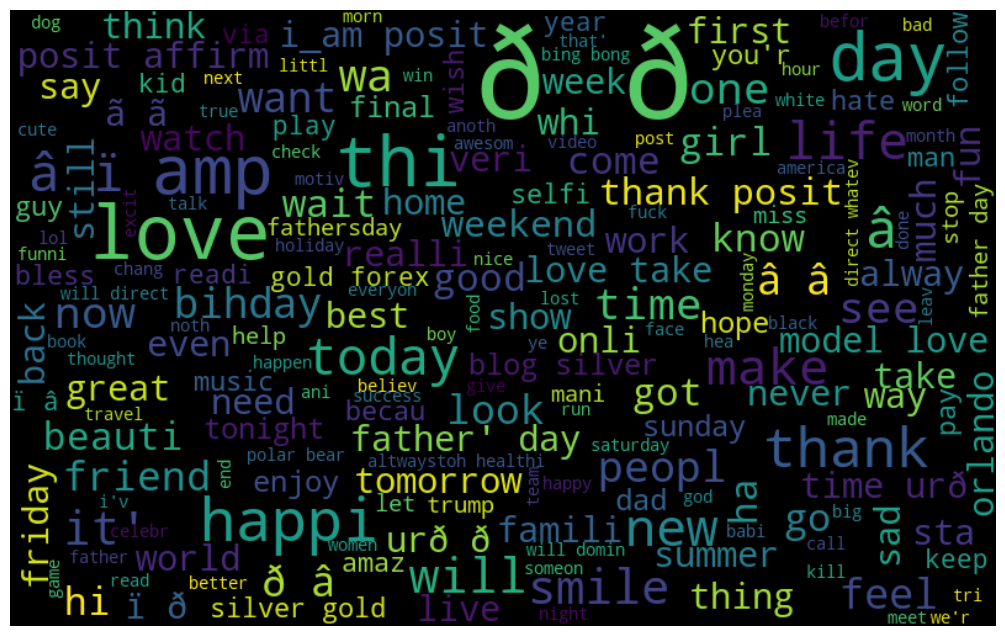

In [22]:
all_words = " ".join([sentence for sentence in tweets['clean_tweet']])
wordcloud = WordCloud(width = 800, height = 500 ,background_color ='black', random_state = 42, max_font_size = 100).generate(all_words)

# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### <span style = 'color: red'> Positive Words</span>

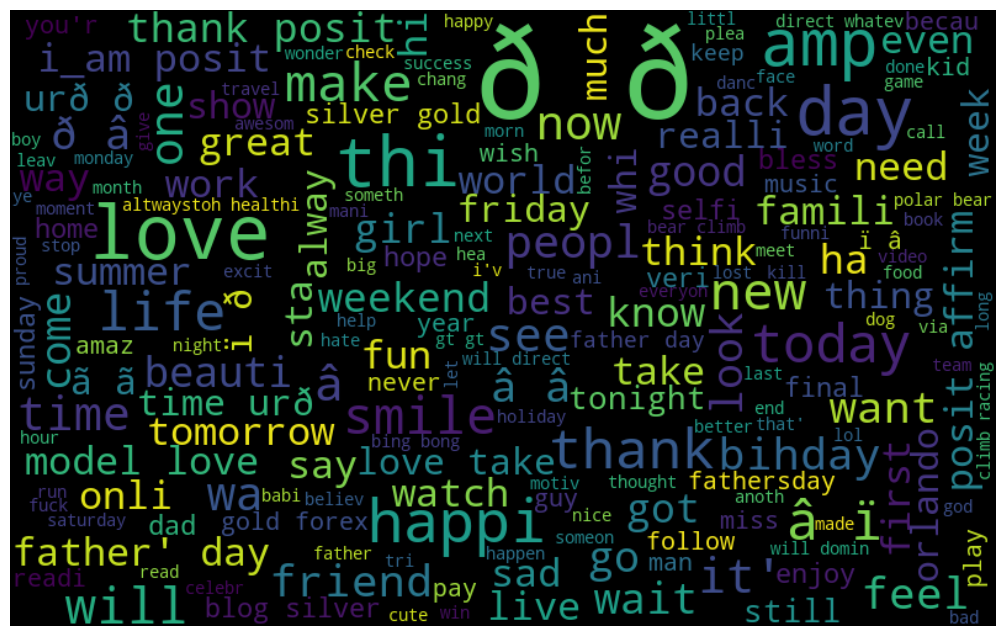

In [24]:
all_words = " ".join([sentence for sentence in tweets['clean_tweet'][tweets['label'] == 0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500 ,background_color = 'black', random_state = 42, max_font_size = 100).generate(all_words)

# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### <span style = 'color: red'> Negative Words</span>

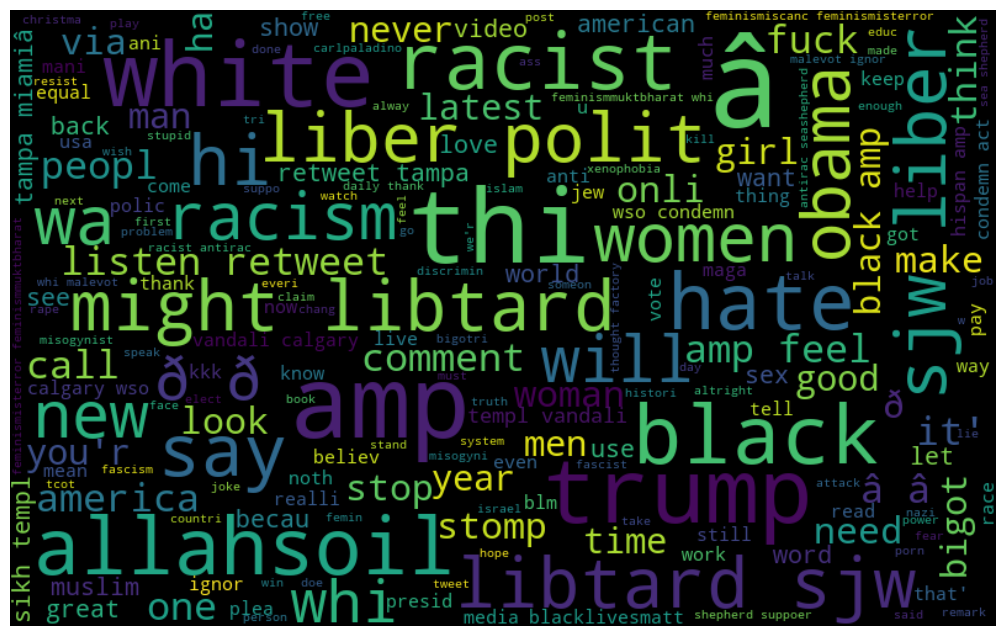

In [25]:
all_words = " ".join([sentence for sentence in tweets['clean_tweet'][tweets['label'] == 1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 500 ,background_color = 'black', random_state = 42, max_font_size = 100).generate(all_words)

# Plot the graph
plt.figure(figsize= (15,8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### <span style = 'color: red'> Hashtag </span>

In [26]:
def hashtag_extract(tweet):
    hashtags = []
    # Loop words in the tweet
    for tweets in tweet:
        ht = re.findall(r"#(\w+)", tweets)
        hashtags.append(ht)
    return hashtags

### <span style = 'color: red'> Hashtag: Non Racist/Sexist Tweets </span>

In [27]:
ht_positive = hashtag_extract(tweets['clean_tweet'][tweets['label'] == 0])
ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['80day', 'gettingf'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro2016'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconf', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift1989'],
 ['trave

### <span style = 'color: red'> Hashtag: Racist/Sexist Tweets </span>

In [28]:
ht_negative= hashtag_extract(tweets['clean_tweet'][tweets['label'] == 1])
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'medâ'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golfâ'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 ['â'],
 ['stereotyp', 'prejud', 'hope', 'hate', 'conflictâ'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 ['2016'],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatred', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['p2', 'p21', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'officerâ'],
 [],
 ['black', 'retweet', 'tampa', 'miamiâ'],
 ['allahsoil'],
 [],
 ['prai', 'cleveland',

### <span style = 'color: red'> First 5 positive hashtags </span>

In [29]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

### <span style = 'color: red'> First 5 negative hashtags </span>

In [30]:
ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

### <span style = 'color: red'> Unrest List </span>

In [31]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

### <span style = 'color: red'> Single list of first 5 positive hashtags </span>

In [32]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

### <span style = 'color: red'> Single list of first 5 negative hashtags </span>

In [33]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

### <span style = 'color: red'> NLP: Positive Hashtag </span>

In [34]:
freq = nltk.FreqDist(ht_positive)
sent = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count' : list(freq.values())})
sent.head()


,Hashtag,Count
0,run,70
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,374


### <span style = 'color: red'> Top 10 positive hashtags </span>

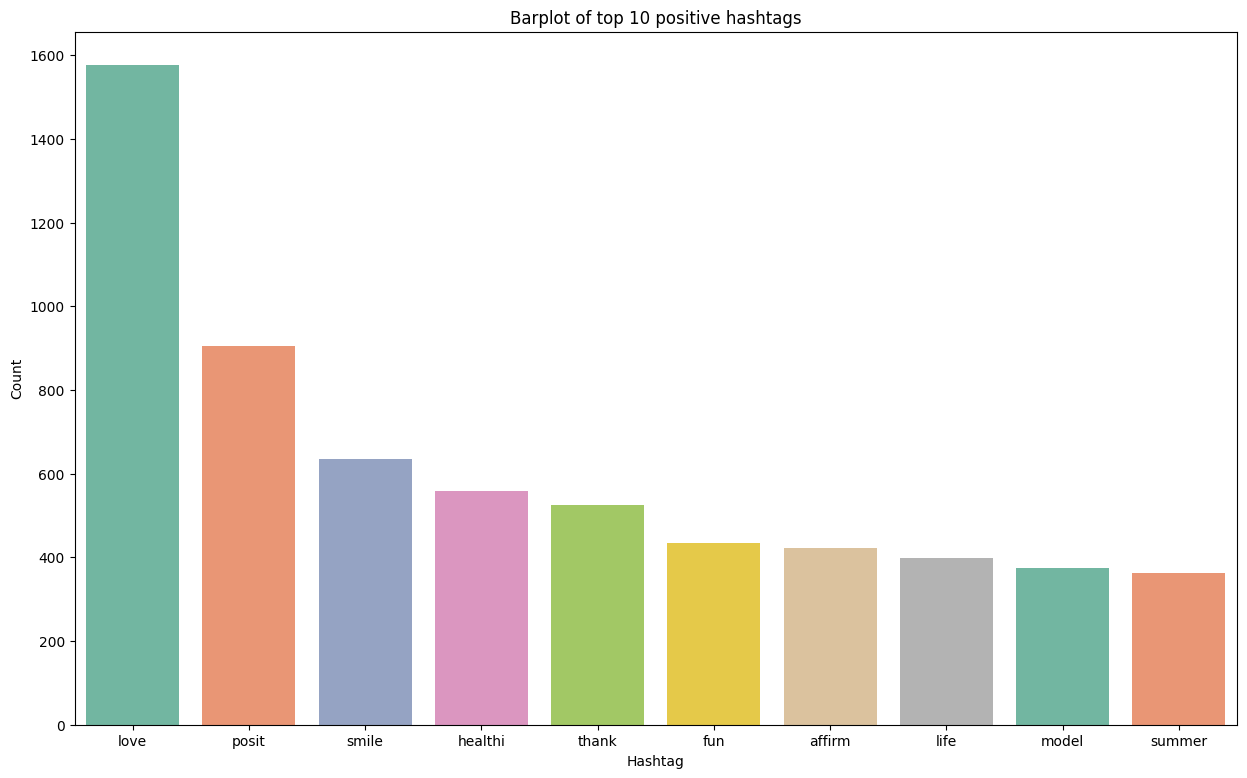

In [42]:
sent = sent.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15, 9))
sns.barplot(data = sent, x = 'Hashtag', y = 'Count',palette ='Set2')
plt.title("Barplot of top 10 positive hashtags")
plt.show()

### <span style = 'color: red'> NLP: Negative Hashtag </span>

In [43]:
freq = nltk.FreqDist(ht_negative)
sent = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count' : list(freq.values())})
sent.head()


,Hashtag,Count
0,cnn,9
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,2


### <span style = 'color: red'> Top 10 negative hashtags </span>

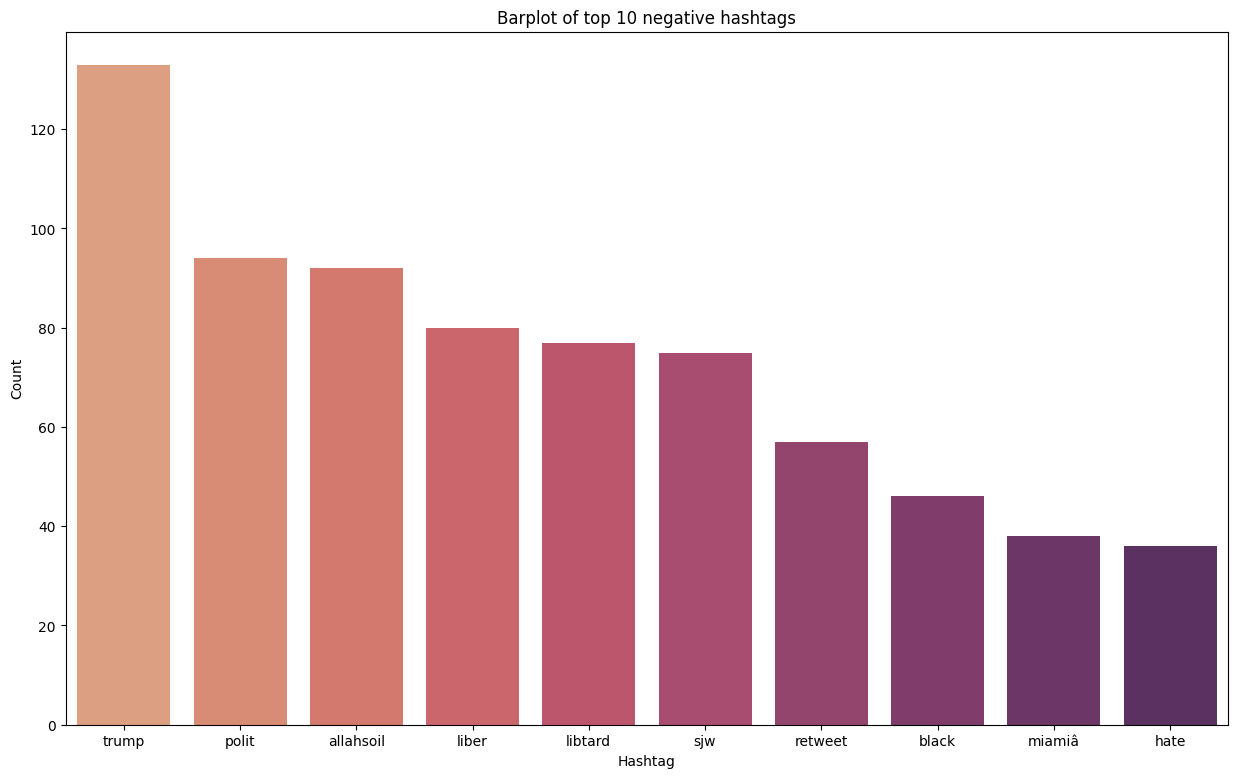

In [47]:
sent = sent.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15, 9))
sns.barplot(data = sent, x = 'Hashtag', y = 'Count',palette = 'flare')
plt.title("Barplot of top 10 negative hashtags")
plt.show()

### <span style = 'color: red'> Feature Extraction </span>

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features = 1000, stop_words = 'english')
bow = bow_vectorizer.fit_transform(tweets['clean_tweet'])


In [57]:
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 134936 stored elements in Compressed Sparse Row format>

### <span style = 'color: red'> Train - Test Split </span>

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, tweets['label'], random_state = 43, test_size = 0.25)


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
model = LogisticRegression()
model

LogisticRegression()

In [60]:
model.fit(X_train, y_train)


LogisticRegression()

### <span style = 'color: red'> F1 Score </span>

In [61]:
pred = model.predict(X_test)
f1_score(y_test, pred)

0.5108958837772397

### <span style = 'color: red'> Accuracy Score </span>

In [62]:
accuracy_score(y_test, pred)

0.9494431235139532

In [63]:
pred_prob = model.predict_proba(X_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(int)

f1_score(y_test, pred)

0.5900990099009901

In [64]:
accuracy_score(y_test, pred)

0.9481917156801402

In [65]:
from sklearn.metrics import classification_report, accuracy_score

In [66]:
score = accuracy_score(y_test, pred)
print("\nAccuracy score :", score*100)
report = classification_report(y_test, pred)
print("\nClassification Report :\n", report)


Accuracy score : 94.81917156801401

Classification Report :
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      7433
           1       0.66      0.53      0.59       558

    accuracy                           0.95      7991
   macro avg       0.81      0.76      0.78      7991
weighted avg       0.94      0.95      0.95      7991



In [67]:
tweets['label'].value_counts(normalize=True)

label
0    0.929854
1    0.070146
Name: proportion, dtype: float64

### <span style = 'color: red'> Pie Chart </span>

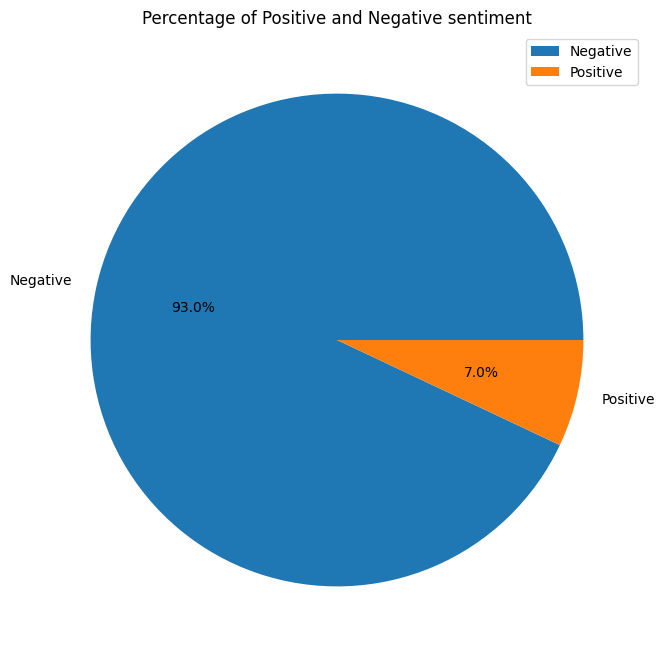

In [68]:
plt.figure(figsize=(10,8))
plt.pie(tweets['label'].value_counts(),labels=['Negative','Positive'],autopct='%1.1f%%')
plt.title("Percentage of Positive and Negative sentiment")
plt.legend()
plt.show()

### <span style = 'color: red'> Conclusion </span>
- Twitter Sentiments Analysis :

- Algorithm:Logistic Regression:

- Accuracy: 95%

### <span style = 'color: red'> Observations </span>

- 93% people have negative sentiments or racist/sexist tweets

- 7% people have positive sentiments or non racist/sexist tweets

- Number of Negative Sentiments are greater than Positive sentiments

- In top 10 'positive hashtags' or non racist/sexist tweets

  - 'love' is highest around 1550.
  - 'summer' is least around 40.

- In top 10 'negative hashtags' or racist/sexist tweets

  - 'trump' is highest above 130
  - 'hate' is least around 40
